In [1]:
#!/usr/bin/env python
# coding: utf-8
# 匯入必要模組
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql

In [2]:
# 設定顯示最大值
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
# 讀取train資料
train = pd.read_csv('train.csv', encoding='utf-8', index_col='Id')
train['source'] = 'train'

In [4]:
# 讀取test資料
test = pd.read_csv('test.csv', encoding='utf-8', index_col='Id')
test['source'] = 'test'

In [5]:
# 將train與test合併
train_test = pd.concat([train, test], axis=0, sort=False)
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,test
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,test
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN

In [6]:
# 將資料屬性和na數量整理成一個表
df_info = pd.DataFrame({'dtypes':train_test.dtypes, 'na':train_test.isna().sum(), 'null':train_test.isnull().sum()})
df_info
# 高達八成na的欄位:Alley、PoolQC、Fence、MiscFeature
# 高達五成na的欄位:FireplaceQu

,dtypes,na,null
MSSubClass,int64,0,0
MSZoning,object,4,4
LotFrontage,float64,486,486
LotArea,int64,0,0
Street,object,0,0
Alley,object,2721,2721
LotShape,object,0,0
LandContour,object,0,0
Utilities,object,2,2
LotConfig,object,0,0


In [7]:
# 先處理na高達五～八成的欄位

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Alley
Grvl    120
Pave     78
dtype: int64


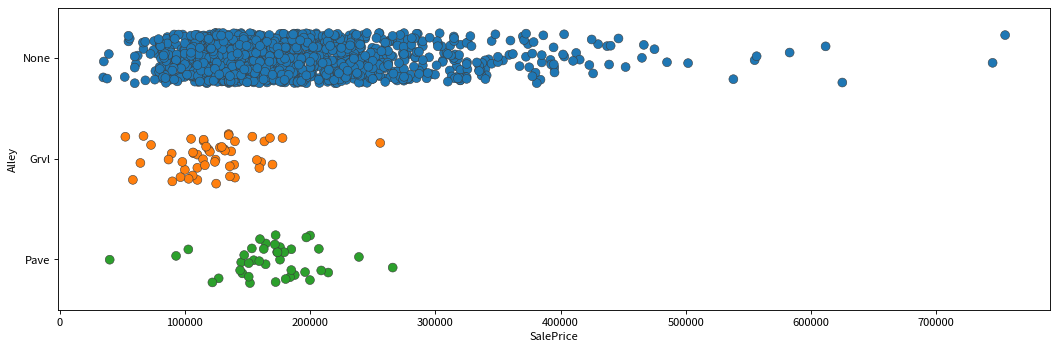

In [8]:
# Alley:胡同進入物業的類型，觀察它與價格的關係
df = train_test[['Alley', 'SalePrice']]
df['Alley'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('Alley').size())

# 繪圖
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.SalePrice, df.Alley, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

#Grvl與Pave有小部分的價差，欄位暫時保留，na值改為None
train_test['Alley'].fillna('None', inplace=True)

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


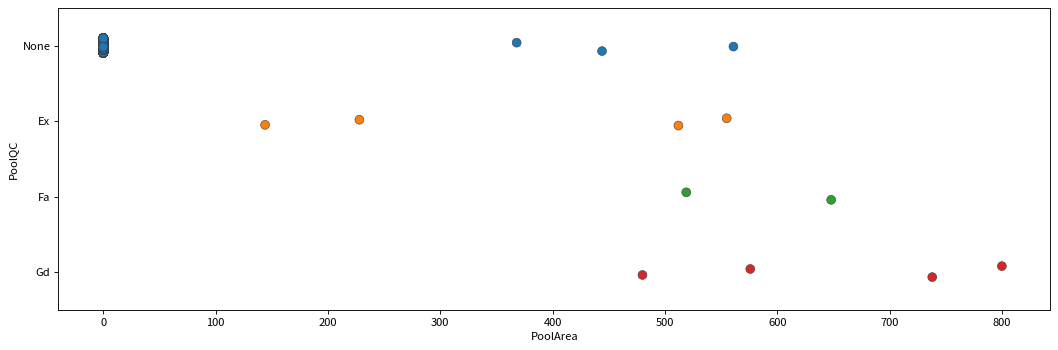

In [9]:
# PoolQC:泳池質量，可能與PoolArea有關係，繪圖觀察
df = train_test[['PoolQC', 'PoolArea']]
df['PoolQC'].fillna('None', inplace=True)

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)
sns.stripplot(df.PoolArea, df.PoolQC, jitter=0.1, size=8, ax=ax, linewidth=.5)
plt.show()

# 果然PoolQC為空值的話，PoolArea即為0，因此將na改為None，保留欄位
train_test['PoolQC'].fillna('None', inplace=True)

# 但有三筆PoolQC為None的樣本，在PoolArea卻有值，之後待處理

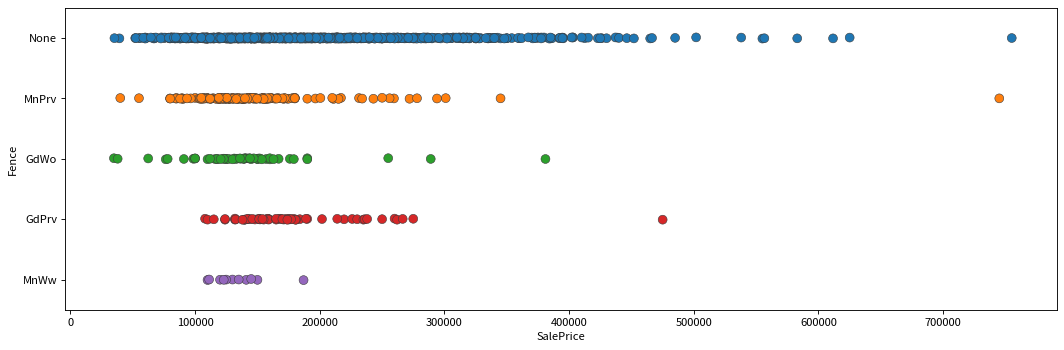

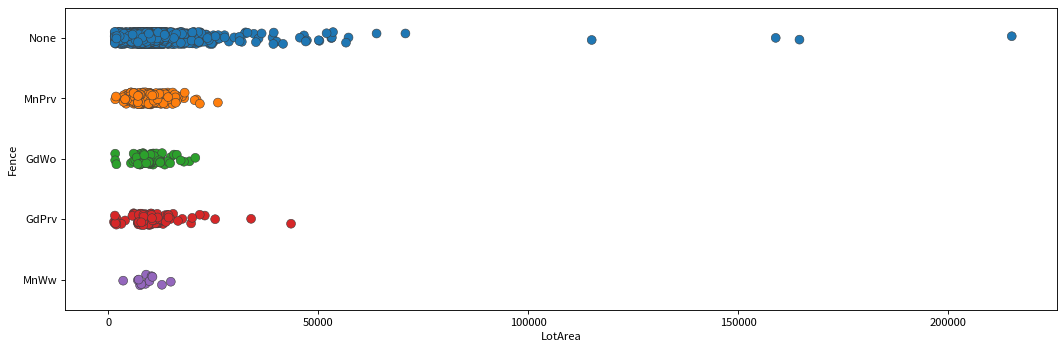

In [10]:
# Fence:柵欄，空值可能為沒有柵欄
df = train_test[['Fence', 'SalePrice', 'LotArea']]
df['Fence'].fillna('None', inplace=True)

# 繪圖:Fence & SalePrice
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)
sns.stripplot(df.SalePrice, df.Fence, jitter=0.01, size=8, ax=ax, linewidth=.5)
plt.show()

# 繪圖:Fence & LotArea
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)
sns.stripplot(df.LotArea, df.Fence, jitter=0.1, size=8, ax=ax, linewidth=.5)
plt.show()

# 看似空值為沒有柵欄，將na轉為None
train_test['Fence'].fillna('None', inplace=True)

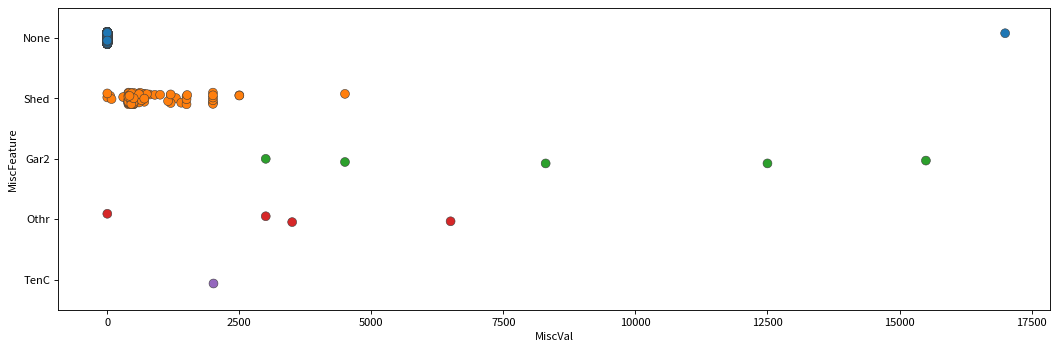

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
# MiscFeature:涵蓋的其他功能
df = train_test[['MiscFeature', 'SalePrice', 'MiscVal']]
df['MiscFeature'].fillna('None', inplace=True)

# 繪圖:MiscFeature & MiscVal
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)
sns.stripplot(df.MiscVal, df.MiscFeature, jitter=0.1, size=8, ax=ax, linewidth=.5)
plt.show()

# 看得出來MiscFeature為None的，在MiscVal就沒有任何價值，可填入None
train_test['MiscFeature'].fillna('None', inplace=True)

# 有一個MiscFeature為None卻有高價，查看該資料
train_test.loc[train_test['MiscVal'] > 15000].loc[train_test['MiscFeature'] == 'None']

# 將此資料值取代掉
train_test['MiscVal'].loc[2550] = 0

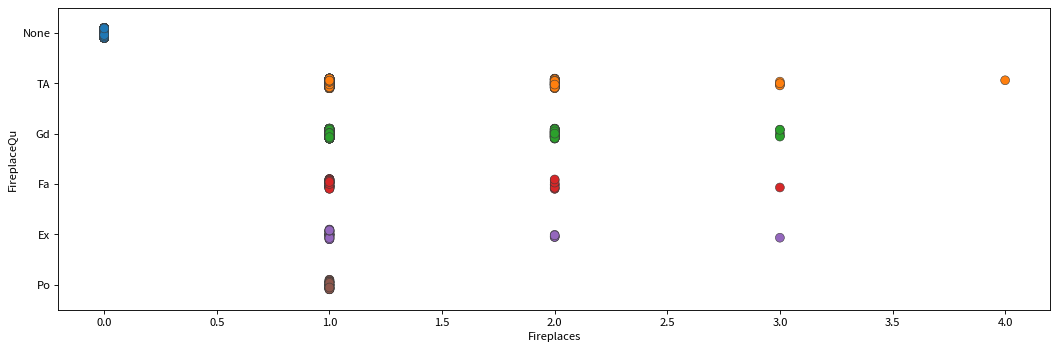

In [12]:
# FireplaceQu(壁爐質量)，可與Fireplaces(壁爐數量)一起觀察
df = train_test[['FireplaceQu', 'Fireplaces']]
df['FireplaceQu'].fillna('None', inplace=True)

# 繪圖:MiscFeature & MiscVal
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)
sns.stripplot(df.Fireplaces, df.FireplaceQu, jitter=0.1, size=8, ax=ax, linewidth=.5)
plt.show()

# 可放心的將FirepplaceQu為na的，替換為None
train_test['FireplaceQu'].fillna('None', inplace=True)

In [13]:
# 檢查各樣本的na數量及缺失情況
df = train_test
df['na_num'] = len(df.columns) - df.count(axis=1)
df.groupby('na_num').size()

na_num
0     1094
1     1355
2      228
3       14
4        4
5       92
6      101
7       11
8        5
10       7
11       6
12       2
dtype: int64

In [14]:
# 觀察na欄位大於10個之樣本
df.loc[df['na_num'] >= 10]
# 暫時不刪除，留到各變項處理

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000.0,train,10
521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,694,600,0,1294,0.0,0.0,2,0,3,2,TA,7,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,220,114,210,0,0,0,None,None,None,0,8,2008,WD,Normal,106250.0,train,10
534,20,RL,50.0,5000,Pave,None,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,None,0,1,2007,WD,Normal,39300.0,train,10
706,190,RM,70.0,5600,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,372,720,0,1092,0.0,0.0,2,0,3,2,Fa,7,Mod,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,Othr,3500,7,2010,WD,Normal,55000.0,train,10
1012,90,RL,75.0,9825,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,1664,0,0,1664,0.0,0.0,2,0,4,2,TA,8,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,100000.0,train,10
1180,20,RL,77.0,8335,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1124,0,0,1124,0.0,0.0,1,0,3,1,TA,5,Min2,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,190,0,0,0,None,None,None,0,4,2006,WD,Normal,93000.0,train,10
1219,50,RM,52.0,6240,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,N,SBrkr,672,240,0,912,0.0,0.0,1,0,2,1,TA,3,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,None,None,None,0,7,2006,WD,Normal,80500.0,train,10
1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,None,None,Shed,500,2,2010,WD,Normal,NaN,test,11
1848,20,RL,NaN,9000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,Non

In [15]:
# # 本次不進行
# # 將類別轉數字-5點量尺:ExterQual、ExterCond、HeatingQC、KitchenQual、BsmtQual、BsmtCond、BsmtExposure、GarageQual、FireplaceQu
# # 將類別轉數字-6點量尺:BsmtFinType1、BsmtFinType2
# scale_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,
#               'Av':3,'Mn':2,'No':1,
#               'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,
#               'None':0}
# OtoN_list = ['ExterQual','ExterCond','HeatingQC','KitchenQual','BsmtQual','BsmtCond',
#              'BsmtFinType1','BsmtExposure','BsmtFinType2','GarageQual','GarageCond','FireplaceQu']
# for i in OtoN_list:
#     train_test[i] = train_test[i].map(scale_dict)

In [16]:
# 將數字轉類別:MSSubClass（原本想直接將資料型態改為object，結果不行）
MSS_dict = {20:'A_1s_af1946', 30:'B_1s_bf1945', 40:'C_1s_attic', 45:'D_1.5s_unf', 50:'E_1.5s',
            60:'F_2s_af1946', 70:'G_2s_bf1945', 75:'P_2.5s', 80:'H_mul-lev', 85:'I_foyer', 90:'J_duplex',
            120:'K_1s_af1946_pud', 150:'L_1.5s_pud', 160:'M_2s_af1946_pud', 180:'N_mul-lev&foyer_pud',
            190:'O_two-family'}
train_test['MSSubClass'] = train_test['MSSubClass'].map(MSS_dict)  #同時自動從int64轉為object資料型態

In [17]:
# 檢查類別欄位的資料分布
object_list = ['MSSubClass','MSZoning','LotShape','LandContour','Utilities','LotConfig',
               'LandSlope','Neighborhood','Condition1','Condition2','BldgType',
               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
               'MasVnrType','Foundation','Heating','CentralAir','Electrical',
               'Functional','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition',
               'ExterQual','ExterCond','HeatingQC','KitchenQual','BsmtQual',
               'BsmtCond','BsmtExposure','GarageQual','FireplaceQu','BsmtFinType1','BsmtFinType2']
for i in object_list:
    print(train_test.groupby(i).size().sort_values(ascending=False))
    print()

MSSubClass
A_1s_af1946            1079
F_2s_af1946             575
E_1.5s                  287
K_1s_af1946_pud         182
B_1s_bf1945             139
M_2s_af1946_pud         128
G_2s_bf1945             128
H_mul-lev               118
J_duplex                109
O_two-family             61
I_foyer                  48
P_2.5s                   23
D_1.5s_unf               18
N_mul-lev&foyer_pud      17
C_1s_attic                6
L_1.5s_pud                1
dtype: int64

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
dtype: int64

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
dtype: int64

LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
dtype: int64

Utilities
AllPub    2916
NoSeWa       1
dtype: int64

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
dtype: int64

LandSlope
Gtl    2778
Mod     125
Sev      16
dtype: int64

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edw

In [18]:
# 分佈極度不均，沒有鑑別性，直接刪除欄位:Utilities、Condition2、RoofMatl、Heating
train_test.drop(['Utilities','Condition2','RoofMatl','Heating'], axis=1, inplace=True)

In [19]:
# # 分佈不均，需要進一步處理的類別欄位:
# '''
# MSSubClass、MSZoning、LotShape、LotConfig、LandSlope、Neighborhood、Condition1、HouseStyle
# RoofStyle、Exterior1st、Exterior2nd、MasVnrType、Foundation、Electrical、Functional、SaleType
# '''

In [20]:
### 類別欄位開始處理 ###

In [21]:
# MSSubClass:標識出售中涉及的住宅類型

In [22]:
# 觀察樣本分佈
train_test.groupby('MSSubClass').size().sort_values(ascending=False)

MSSubClass
A_1s_af1946            1079
F_2s_af1946             575
E_1.5s                  287
K_1s_af1946_pud         182
B_1s_bf1945             139
M_2s_af1946_pud         128
G_2s_bf1945             128
H_mul-lev               118
J_duplex                109
O_two-family             61
I_foyer                  48
P_2.5s                   23
D_1.5s_unf               18
N_mul-lev&foyer_pud      17
C_1s_attic                6
L_1.5s_pud                1
dtype: int64

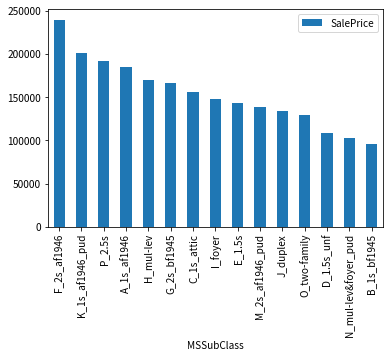

In [23]:
# 觀察不同樣本之金額長條圖
df = train_test[['MSSubClass', 'SalePrice']].dropna()
#df.set_index('MSSubClass', inplace=True)
df.groupby('MSSubClass').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [24]:
# # 將樣本數少的類型'C_1s_attic'歸類至'I_foyer'
# train_test['MSSubClass'].replace('C_1s_attic', 'I_foyer', inplace=True)

In [25]:
# 檢查只有一個樣本的'L_1.5s_pud'售價，發現無資料，歸類至'D_1.5s_unf'
train_test.loc[train_test['MSSubClass'] == 'L_1.5s_pud']  #SalePrice == NaN
train_test['MSSubClass'].replace('L_1.5s_pud', 'D_1.5s_unf', inplace=True)

In [26]:
# MSZoning:標識銷售的一般分區分類

In [27]:
# 觀察樣本分佈
train_test.groupby('MSZoning').size().sort_values(ascending=False)

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
dtype: int64

In [28]:
# 觀察na的資料為何
train_test.loc[train_test['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,B_1s_bf1945,NaN,109.0,21780,Grvl,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,1Fam,1Story,2,4,1910,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,NaN,test,8
2217,A_1s_af1946,NaN,80.0,14584,Pave,None,Reg,Low,Inside,Mod,IDOTRR,Norm,1Fam,1Story,1,5,1952,1952,Gable,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,NaN,test,8
2251,G_2s_bf1945,NaN,NaN,56600,Pave,None,IR1,Low,Inside,Gtl,IDOTRR,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal,NaN,test,3
2905,A_1s_af1946,NaN,125.0,31250,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Artery,1Fam,1Story,1,3,1951,1951,Gable,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,None,None,None,0,5,2006,WD,Normal,NaN,test,7


In [29]:
# na值只有4個，將它值替換成眾數'RL'
train_test['MSZoning'].fillna('RL', inplace=True)

In [30]:
# Street:通往物業的道路類型

In [31]:
# 觀察資料分佈
train_test.groupby('Street').size().sort_values(ascending=False)
# 暫不處理

Street
Pave    2907
Grvl      12
dtype: int64

In [32]:
# LotShape:物業的一般形狀

In [33]:
# 觀察資料分佈
train_test.groupby('LotShape').size().sort_values(ascending=False)

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
dtype: int64

In [34]:
# 檢查不同形狀類別的售價，發現IR2和IR3價格有差，暫時不將兩者合併
df = train_test[['LotShape', 'SalePrice']]
df.groupby('LotShape').mean()

,SalePrice
LotShape,
IR1,206101.665289
IR2,239833.365854
IR3,216036.500000
Reg,164754.818378


In [35]:
# LotConfig:物業相對位置

In [36]:
# 觀察資料分佈
train_test.groupby('LotConfig').size()

LotConfig
Corner      511
CulDSac     176
FR2          85
FR3          14
Inside     2133
dtype: int64

In [37]:
# 發現FR2和FR3價格有差，暫時不將兩者合併
df = train_test[['LotConfig','SalePrice']]
df.groupby('LotConfig').mean()

,SalePrice
LotConfig,
Corner,181623.425856
CulDSac,223854.617021
FR2,177934.574468
FR3,208475.000000
Inside,176938.047529


In [38]:
# LandSlope:物業的傾斜度

In [39]:
# 觀察資料分佈
train_test.groupby('LandSlope').size()

LandSlope
Gtl    2778
Mod     125
Sev      16
dtype: int64

In [40]:
# 發現Sev和其它價格有差，暫時不合併
train_test[['LandSlope','SalePrice']].groupby('LandSlope').mean()

,SalePrice
LandSlope,
Gtl,179956.799566
Mod,196734.138462
Sev,204379.230769


In [41]:
# # 純粹用plt畫畫看長條圖，先將df轉為np，再將np扁平化，才能在plt顯示
# left = ['Gtl','Mod','Sev']
# height = train_test[['LandSlope','SalePrice']].groupby('LandSlope').mean().to_numpy().flatten()
# plt.bar(left, height)

In [42]:
# Neighborhood:物業在Ames City的地理位置

In [43]:
# 觀察資料分佈
train_test.groupby('Neighborhood').size().sort_values(ascending=False)

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
dtype: int64

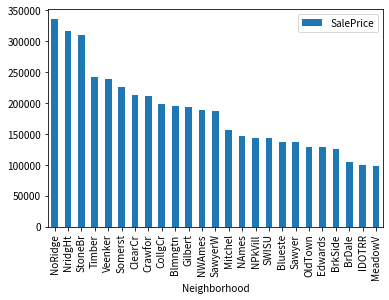

In [44]:
# 預期可以分成四類，尚未處理
df = train_test[['Neighborhood','SalePrice']]
df.groupby('Neighborhood').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [45]:
# Condition1:與各種地點的相近條件

In [46]:
# 觀察資料分佈
train_test.groupby('Condition1').size().sort_values(ascending=False)

Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
dtype: int64

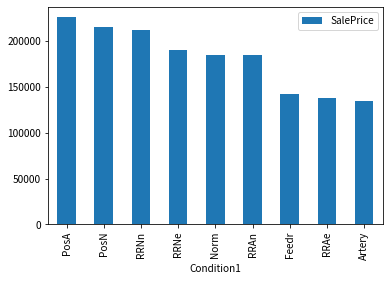

In [47]:
# 觀察不同類型房價
df = train_test[['Condition1','SalePrice']]
df.groupby('Condition1').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [48]:
# 將鄰近鐵路200英尺內的兩個類別RRNn、RRNe合併
train_test['Condition1'].replace('RRNe', 'RRNn', inplace=True)

In [49]:
# HouseStyle:住宅風格

In [50]:
# 觀察資料分佈
train_test.groupby('HouseStyle').size().sort_values(ascending=False)

HouseStyle
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
dtype: int64

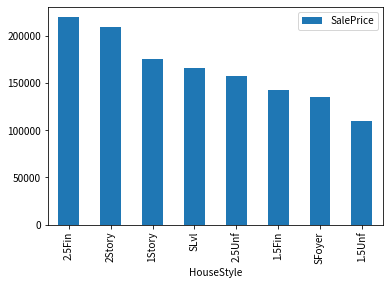

In [51]:
# 觀察不同類型房價（有差異，資料量少的2.5Fin不適合與其他類合併）
df = train_test[['HouseStyle','SalePrice']]
df.groupby('HouseStyle').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [52]:
# 檢查2.5Fin類型的資料來源，發現都是train之資料，未來可考慮刪除
highthouse = train_test.loc[train_test['HouseStyle'] == '2.5Fin']
highthouse

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
186,P_2.5s,RM,90.0,22950,Pave,None,IR2,Lvl,Inside,Gtl,OldTown,Artery,1Fam,2.5Fin,10,9,1892,1993,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,Ex,Y,SBrkr,1518,1518,572,3608,0.0,0.0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0,260,0,0,410,0,None,GdPrv,None,0,6,2006,WD,Normal,475000.0,train,0
199,P_2.5s,RM,92.0,5520,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Norm,1Fam,2.5Fin,6,6,1912,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,755.0,755.0,Ex,Y,SBrkr,929,929,371,2229,0.0,0.0,1,0,5,1,TA,8,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,198,30,0,0,0,None,MnPrv,None,0,7,2009,WD,Abnorml,104000.0,train,5
268,P_2.5s,RL,60.0,8400,Pave,None,Reg,Bnk,Inside,Mod,SWISU,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378.0,Unf,0.0,342.0,720.0,Ex,Y,SBrkr,1052,720,420,2192,0.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1.0,240.0,TA,TA,Y,262,24,0,0,0,0,None,None,None,0,7,2008,WD,Normal,179500.0,train,0
305,P_2.5s,RM,87.0,18386,Pave,None,Reg,Lvl,Inside,Gtl,OldTown,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1470.0,1470.0,Ex,Y,SBrkr,1675,1818,0,3493,0.0,0.0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003.0,Unf,3.0,870.0,TA,TA,Y,302,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,295000.0,train,0
636,O_two-family,RH,60.0,10896,Pave,Pave,Reg,Bnk,Inside,Gtl,SWISU,Feedr,2fmCon,2.5Fin,6,7,1914,1995,Hip,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,110,0,0,0,0,None,None,None,0,3,2007,WD,Abnorml,200000.0,train,5
884,P_2.5s,RL,60.0,6204,Pave,None,Reg,Bnk,Inside,Gtl,SWISU,Norm,1Fam,2.5Fin,4,5,1912,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,795.0,795.0,TA,N,SBrkr,954,795,481,2230,1.0,0.0,1,0,5,1,TA,10,Typ,0,None,Detchd,1997.0,Unf,1.0,440.0,TA,Gd,Y,0,188,0,0,0,0,None,None,None,0,3,2006,WD,Normal,118500.0,train,0
1032,P_2.5s,RL,102.0,15863,Pave,None,Reg,Lvl,Corner,Gtl,SWISU,Norm,1Fam,2.5Fin,7,3,1920,1970,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,523.0,Unf,0.0,301.0,824.0,Ex,Y,SBrkr,1687,998,397,3082,1.0,0.0,2,1,5,1,TA,12,Typ,2,TA,Basment,1970.0,Fin,2.0,672.0,TA,TA,Y,136,63,0,0,0,0,None,None,None,0,8,2009,WD,Normal,197000.0,train,0
1441,G_2s_bf1945,RL,79.0,11526,Pave,None,IR1,Bnk,Inside,Mod,Crawfor,Norm,1Fam,2.5Fin,6,7,1922,1994,Gable,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Ex,TA,No,Unf,0.0,Unf,0.0,588.0,588.0,Fa,Y,SBrkr,1423,748,384,2555,0.0,0.0,2,0,3,1,TA,11,Min1,1,Gd,Detchd,1993.0,Fin,2.0,672.0,TA,TA,Y,431,0,0,0,0,0,None,None,None,0,9,2008,WD,Normal,191000.0,train,0


In [53]:
# RoofStyle:屋頂類型

In [54]:
# 觀察資料分佈
train_test.groupby('RoofStyle').size().sort_values(ascending=False)

RoofStyle
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
dtype: int64

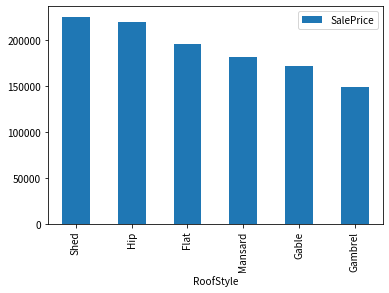

In [55]:
# 觀察不同類型房價
df = train_test[['RoofStyle','SalePrice']]
df.groupby('RoofStyle').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [56]:
# 觀察Shed資料來源
train_test.loc[train_test['RoofStyle'] == 'Shed']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1231,J_duplex,RL,NaN,18890,Pave,None,IR1,Lvl,Inside,Gtl,Sawyer,Feedr,Duplex,1.5Fin,5,5,1977,1977,Shed,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,None,None,Gar2,8300,8,2007,WD,Normal,190000.0,train,1
1271,C_1s_attic,RL,NaN,23595,Pave,None,Reg,Low,Inside,Sev,ClearCr,Norm,1Fam,1Story,7,6,1979,1979,Shed,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258.0,Unf,0.0,74.0,1332.0,TA,Y,SBrkr,1332,192,0,1524,2.0,0.0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2.0,586.0,TA,TA,Y,268,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,260000.0,train,1
2514,A_1s_af1946,RL,155.0,20064,Pave,None,IR1,Low,Inside,Sev,ClearCr,Norm,1Fam,1Story,8,6,1976,1976,Shed,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,Gd,Gd,LwQ,51.0,GLQ,915.0,0.0,966.0,Ex,Y,SBrkr,1743,0,0,1743,2.0,0.0,0,1,0,1,Gd,5,Typ,2,Fa,Attchd,1976.0,Fin,2.0,529.0,TA,TA,Y,646,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,NaN,test,1
2611,A_1s_af1946,RL,124.0,27697,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,4,3,1961,1961,Shed,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,None,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,None,None,None,0,11,2007,COD,Abnorml,NaN,test,2
2807,A_1s_af1946,RL,50.0,5500,Pave,None,Reg,Lvl,Inside,Gtl,SWISU,Norm,1Fam,1Story,7,5,2004,2004,Shed,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,Gd,Mn,GLQ,510.0,LwQ,373.0,190.0,1073.0,Ex,Y,SBrkr,1073,0,0,1073,1.0,0.0,2,0,2,1,TA,4,Typ,0,None,Detchd,2004.0,Unf,1.0,246.0,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,5,2006,WD,Normal,NaN,test,1


In [57]:
# 將'Shed'類型替換成'Hip'
train_test['RoofStyle'].replace('Shed','Hip', inplace=True)

In [58]:
# Exterior1st:房屋外牆

In [59]:
# 觀察na資料為何
train_test.loc[train_test['Exterior1st'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,B_1s_bf1945,RL,85.0,19550,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,7,1940,2007,Flat,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal,NaN,test,8


In [60]:
# 用眾數填補na
train_test['Exterior1st'].fillna('VinylSd', inplace=True)

In [61]:
# 觀察資料分佈
train_test.groupby('Exterior1st').size().sort_values(ascending=False)

Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
dtype: int64

In [62]:
# other = BrkComn, CBlock, AsphShn, ImStucc
# 觀察樣本少的資料來源（使用多條件篩選isin()）
train_test.loc[train_test['Exterior1st'].isin(['BrkComm','Stone','CBlock','AsphShn','ImStucc'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
411,A_1s_af1946,RL,68.0,9571,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,3,1958,1958,Gable,BrkComm,Brk Cmn,None,0.0,TA,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1276.0,1276.0,TA,Y,FuseA,1276,0,0,1276,0.0,0.0,1,0,3,1,TA,5,Mod,0,None,Attchd,1958.0,Unf,1.0,350.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,COD,Abnorml,60000.0,train,0
1001,A_1s_af1946,RL,74.0,10206,Pave,None,Reg,Lvl,Corner,Gtl,Edwards,Norm,1Fam,1Story,3,3,1952,1952,Flat,BrkComm,Brk Cmn,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Fa,N,FuseF,944,0,0,944,0.0,0.0,1,0,2,1,Fa,4,Min1,0,None,Detchd,1956.0,Unf,2.0,528.0,TA,Fa,Y,0,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal,82000.0,train,5
1012,J_duplex,RL,75.0,9825,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,Duplex,1Story,5,5,1965,1965,Hip,AsphShn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,N,SBrkr,1664,0,0,1664,0.0,0.0,2,0,4,2,TA,8,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,100000.0,train,10
1025,A_1s_af1946,RL,NaN,15498,Pave,None,IR1,Lvl,Corner,Gtl,Timber,Norm,1Fam,1Story,8,6,1976,1976,Hip,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165.0,LwQ,400.0,0.0,1565.0,TA,Y,SBrkr,2898,0,0,2898,1.0,0.0,2,0,2,1,Gd,10,Typ,1,Gd,Attchd,1976.0,Fin,2.0,665.0,TA,TA,Y,0,72,174,0,0,0,None,None,None,0,5,2008,COD,Abnorml,287000.0,train,1
1153,A_1s_af1946,RL,90.0,14115,Pave,None,IR1,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,1Story,6,7,1956,2004,Gable,Stone,Stone,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,296.0,GLQ,547.0,230.0,1073.0,Ex,Y,SBrkr,1811,0,0,1811,0.0,0.0,1,0,2,1,Ex,6,Typ,1,Gd,Attchd,1956.0,Fin,2.0,470.0,TA,TA,Y,0,0,280,0,0,0,None,None,None,0,7,2006,WD,Abnorml,230000.0,train,0
1188,A_1s_af1946,RL,89.0,12461,Pave,None,Reg,Lvl,Corner,Gtl,NoRidge,Norm,1Fam,1Story,8,5,1994,1995,Gable,ImStucc,ImStucc,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1456.0,Unf,0.0,168.0,1624.0,Ex,Y,SBrkr,1624,0,0,1624,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1994.0,RFn,3.0,757.0,TA,TA,Y,0,114,192,0,0,0,None,GdPrv,None,0,7,2006,WD,Normal,262000.0,train,0
1371,E_1.5s,RL,90.0,5400,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Artery,1Fam,1.5Fin,4,6,1920,1950,Gable,CBlock,CBlock,None,0.0,Fa,TA,PConc,TA,TA,No,ALQ,315.0,Rec,105.0,420.0,840.0,Ex,Y,SBrkr,840,534,0,1374,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1967.0,Fin,1.0,338.0,TA,TA,Y,0,0,198,0,0,0,None,None,None,0,10,2009,WD,Normal,105000.0,train,0
1765,A_1s_af1946,RL,90.0,9900,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,6,5,1967,1967,Gable,BrkComm,Brk Cmn,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,1173.0,Unf,0.0,507.0,1680.0,TA,Y,SBrkr,1691,0,0,1691,1.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1967.0,Unf,2.0,550.0,Gd,TA,Y,0,67,260,0,0,0,None,MnPrv,None,0,4,2009,WD,Normal,NaN,test,1
1906,E_1.5s,RL,78.0,15600,Pave,None,Reg,Bnk,Inside,Gtl,Crawfor,Norm,1Fam,1.5Fin,5,7,1949,2005,Gable,BrkComm,Brk Cmn,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,312.0,Rec,507.0,248.0,1067.0,Fa,N,SBrkr,986,537,0,1523,1.0,0.0,2,0,3,1,Fa,7,Maj2,1,TA,Attchd,1949.0,Unf,1.0,295.0,TA,TA,Y,0,0,81,0,0,0,None,None,None,0,10,2009,WD,Normal,NaN,test,1


In [63]:
# 觀察不同類型房價
df = train_test[['Exterior1st','SalePrice']]
df.groupby('Exterior1st').mean().sort_values('SalePrice', ascending=False)

,SalePrice
Exterior1st,
ImStucc,262000.000000
Stone,258500.000000
CemntBd,231690.655738
VinylSd,213732.900971
BrkFace,194573.000000
Plywood,175942.379630
HdBoard,163077.450450
Stucco,162990.000000
WdShing,150655.076923


In [64]:
# 樣本極小又都是train的資料，刪除
rmdata_index = train_test.loc[train_test['Exterior1st'].isin(['Stone','ImStucc'])].index
train_test.drop(rmdata_index, inplace=True)

In [65]:
# BrkComn、CBlock、AsphShn統一歸為BrkComn
train_test['Exterior1st'].replace(['CBlock','AsphShn'], 'BrkComn', inplace=True)

In [66]:
# Exterior2nd:房屋外牆(如有多種材料)

In [67]:
# 觀察na資料為何
train_test.loc[train_test['Exterior2nd'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,B_1s_bf1945,RL,85.0,19550,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,7,1940,2007,Flat,VinylSd,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal,NaN,test,8


In [68]:
# 用眾數填補na值
train_test['Exterior2nd'].fillna('VinylSd', inplace=True)

In [69]:
# 觀察資料分佈
train_test.groupby('Exterior2nd').size().sort_values(ascending=False)

Exterior2nd
VinylSd    1015
MetalSd     447
HdBoard     405
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      14
Stone         5
AsphShn       4
CBlock        3
Other         1
dtype: int64

In [70]:
# 為比對1st與2nd是否一致，得統一兩欄資料分類方式
# Brk Cmn替換成BrkComm
train_test['Exterior2nd'].replace('Brk Cmn', 'BrkComm', inplace=True)
# CmentBd替換成CemntBd
train_test['Exterior2nd'].replace('CmentBd','CemntBd', inplace=True)
# Wd Shng替換成WdShing
train_test['Exterior2nd'].replace('Wd Shng','WdShing', inplace=True)

In [71]:
# 觀察樣本少的資料來源
train_test.loc[train_test['Exterior2nd'].isin(['Stone', 'AsphShn', 'CBlock', 'Other'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
299,F_2s_af1946,RL,90.0,11700,Pave,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,2Story,6,6,1968,1968,Mansard,HdBoard,AsphShn,BrkFace,365.0,Gd,TA,CBlock,TA,TA,No,ALQ,384.0,Rec,175.0,143.0,702.0,Gd,Y,SBrkr,1041,702,0,1743,0.0,1.0,1,2,3,1,TA,7,Typ,1,Gd,Attchd,1968.0,Unf,2.0,539.0,TA,TA,Y,224,0,0,0,0,0,None,None,None,0,6,2007,WD,Normal,175000.0,train,0
530,A_1s_af1946,RL,NaN,32668,Pave,None,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,1Fam,1Story,6,3,1957,1975,Hip,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624.0,train,3
575,H_mul-lev,RL,70.0,10500,Pave,None,Reg,Lvl,FR2,Gtl,NAmes,Norm,1Fam,SLvl,5,7,1971,2005,Gambrel,MetalSd,AsphShn,BrkFace,82.0,TA,TA,CBlock,TA,TA,Av,ALQ,349.0,Unf,0.0,23.0,372.0,TA,Y,SBrkr,576,533,0,1109,0.0,1.0,1,0,3,1,TA,5,Typ,0,None,BuiltIn,1971.0,Unf,1.0,288.0,TA,TA,Y,35,0,0,0,0,0,None,GdWo,None,0,12,2007,WD,Normal,139000.0,train,0
596,A_1s_af1946,RL,69.0,11302,Pave,None,IR1,Lvl,Inside,Gtl,StoneBr,Norm,1Fam,1Story,8,5,2005,2006,Gable,VinylSd,Other,BrkFace,238.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1422.0,Unf,0.0,392.0,1814.0,Ex,Y,SBrkr,1826,0,0,1826,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2005.0,Fin,3.0,758.0,TA,TA,Y,180,75,0,0,120,0,None,None,None,0,8,2006,New,Partial,319000.0,train,0
737,J_duplex,RL,60.0,8544,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Duplex,1Story,3,4,1950,1950,Gable,Stucco,Stone,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Gd,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,None,Detchd,1949.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2006,WD,Normal,93500.0,train,5
1012,J_duplex,RL,75.0,9825,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,Duplex,1Story,5,5,1965,1965,Hip,BrkComn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,N,SBrkr,1664,0,0,1664,0.0,0.0,2,0,4,2,TA,8,Typ,0,None,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,100000.0,train,10
1344,E_1.5s,RL,57.0,7558,Pave,None,Reg,Bnk,Inside,Gtl,Crawfor,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,None,None,None,0,3,2009,WD,Normal,177000.0,train,0
1371,E_1.5s,RL,90.0,5400,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Artery,1Fam,1.5Fin,4,6,1920,1950,Gable,BrkComn,CBlock,None,0.0,Fa,TA,PConc,TA,TA,No,ALQ,315.0,Rec,105.0,420.0,840.0,Ex,Y,SBrkr,840,534,0,1374,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1967.0,Fin,1.0,338.0,TA,TA,Y,0,0,198,0,0,0,None,None,None,0,10,2009,WD,Normal,105000.0,train,0
1413,J_duplex,RL,60.0,7200,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Duplex,1Story,4,5,1949,1950,Gable,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,None,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,90000.0,train,5


In [72]:
# 樣本極小又是train之資料，刪除
train_test.drop(596, inplace=True)

In [73]:
# 衍伸變項[Exterior_two]:是否為多建材
train_test['Exterior_two'] = train_test['Exterior1st'].eq(train_test['Exterior2nd'])
train_test['Exterior_two'].replace({False:1,True:0}, inplace=True)
train_test[['Exterior1st','Exterior2nd','Exterior_two']]

,Exterior1st,Exterior2nd,Exterior_two
Id,,,
1,VinylSd,VinylSd,0
2,MetalSd,MetalSd,0
3,VinylSd,VinylSd,0
4,Wd Sdng,WdShing,1
5,VinylSd,VinylSd,0
...,...,...,...
2915,CemntBd,CemntBd,0
2916,CemntBd,CemntBd,0
2917,VinylSd,VinylSd,0


In [74]:
# 觀察建材單一者的樣本數
train_test.groupby('Exterior_two').size().sort_values(ascending=False)

Exterior_two
0    2646
1     269
dtype: int64

In [75]:
# MasVnrType:石工外飾類型

In [76]:
# 觀察資料分佈
train_test.groupby('MasVnrType').size().sort_values(ascending=False)

MasVnrType
None       1739
BrkFace     878
Stone       249
BrkCmn       25
dtype: int64

In [77]:
# 觀察不同類型之房價差別
df = train_test[['MasVnrType','SalePrice']]
df.groupby('MasVnrType').mean().sort_values('SalePrice', ascending=False)

,SalePrice
MasVnrType,
Stone,265583.625000
BrkFace,204434.421171
None,155861.456446
BrkCmn,146318.066667


In [78]:
# 用眾數填補na值
train_test['MasVnrType'].fillna('None', inplace=True)

In [79]:
# Foundation:建設類型

In [80]:
# 觀察資料分佈
train_test.groupby('Foundation').size().sort_values(ascending=False)

Foundation
PConc     1305
CBlock    1234
BrkTil     311
Slab        49
Stone       11
Wood         5
dtype: int64

In [81]:
# 看看用石頭和木頭做的房子長什麼樣
train_test.loc[train_test['Foundation'].isin(['Stone','Wood'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,E_1.5s,RL,85.0,14115,Pave,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,train,0,0
247,O_two-family,RM,69.0,9142,Pave,Grvl,Reg,Lvl,Inside,Gtl,OldTown,Norm,2fmCon,2Story,6,8,1910,1950,Gable,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,None,None,None,0,4,2006,WD,Normal,137000.0,train,0,0
712,E_1.5s,C (all),66.0,8712,Pave,Pave,Reg,HLS,Inside,Mod,IDOTRR,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0.0,Unf,0.0,859.0,859.0,Gd,Y,SBrkr,859,319,0,1178,0.0,0.0,1,0,2,1,TA,7,Typ,0,None,Detchd,1964.0,RFn,1.0,384.0,TA,TA,N,68,0,98,0,0,0,None,None,None,0,1,2010,WD,Abnorml,102776.0,train,0,0
748,G_2s_bf1945,RM,65.0,11700,Pave,Pave,IR1,Lvl,Corner,Gtl,OldTown,Norm,1Fam,2Story,7,7,1880,2003,Mansard,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0.0,Unf,0.0,1240.0,1240.0,TA,N,SBrkr,1320,1320,0,2640,0.0,0.0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4.0,864.0,TA,TA,N,181,0,386,0,0,0,None,None,None,0,5,2009,WD,Normal,265979.0,train,0,0
873,A_1s_af1946,RL,74.0,8892,Pave,None,Reg,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,5,7,1953,1996,Gable,WdShing,WdShing,None,0.0,Gd,TA,Stone,TA,TA,Av,Unf,0.0,Unf,0.0,105.0,105.0,Gd,Y,SBrkr,910,0,0,910,0.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Attchd,1953.0,Unf,2.0,414.0,TA,TA,Y,196,0,150,0,0,0,None,GdWo,None,0,10,2008,WD,Normal,116000.0,train,0,0
1181,F_2s_af1946,RL,NaN,11170,Pave,None,IR2,Lvl,Corner,Gtl,Timber,Norm,1Fam,2Story,7,5,1990,1991,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216.0,Unf,0.0,0.0,1216.0,Ex,Y,SBrkr,1298,1216,0,2514,0.0,0.0,2,1,4,1,TA,8,Typ,0,None,Attchd,1990.0,Fin,2.0,693.0,TA,TA,Y,0,0,0,0,0,0,None,GdPrv,None,0,4,2006,WD,Normal,250000.0,train,1,0
1212,E_1.5s,RL,152.0,12134,Pave,None,IR1,Bnk,Inside,Mod,Gilbert,Norm,1Fam,1.5Fin,8,7,1988,2005,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,427.0,Unf,0.0,132.0,559.0,Gd,Y,SBrkr,1080,672,0,1752,0.0,0.0,2,0,4,1,TA,8,Typ,0,None,Basment,1988.0,RFn,2.0,492.0,TA,TA,Y,325,12,0,0,0,0,None,None,None,0,6,2010,WD,Normal,164000.0,train,0,0
1293,G_2s_bf1945,RM,60.0,6600,Pave,None,Reg,Lvl,Corner,Gtl,OldTown,Norm,1Fam,2Story,5,4,1892,1965,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,TA,N,SBrkr,1378,994,0,2372,0.0,0.0,2,0,4,2,TA,11,Min2,0,None,Attchd,1985.0,RFn,1.0,432.0,TA,TA,Y,0,287,0,0,0,0,None,None,None,0,12,2009,WD,Normal,107500.0,train,0,0
1458,G_2s_bf1945,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CemntBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,train,0,0


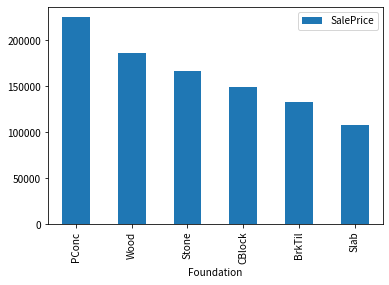

In [82]:
# 看看價格差異，未來可考慮將Stone與Wood合併
df = train_test[['Foundation','SalePrice']]
df.groupby('Foundation').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [83]:
# # 將Stone和Wood歸為一類
# train_test['Foundation'].replace('Wood', 'Stone', inplace=True)

In [84]:
# Electrical:電氣系統

In [85]:
# 觀察資料分佈
train_test.groupby('Electrical').size().sort_values(ascending=False)

Electrical
SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
dtype: int64

In [86]:
# 看看Mix的樣子
train_test.loc[train_test['Electrical'] == 'Mix']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
399,B_1s_bf1945,RM,60.0,8967,Pave,None,Reg,Lvl,Corner,Gtl,IDOTRR,Norm,1Fam,1Story,5,2,1920,1950,Gable,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,961.0,961.0,Gd,Y,Mix,1077,0,0,1077,0.0,0.0,1,0,2,1,TA,6,Maj2,0,None,Detchd,1920.0,Unf,1.0,338.0,Po,Po,N,0,0,0,0,0,0,None,None,None,0,11,2007,WD,Abnorml,67000.0,train,0,0


In [87]:
# 刪除Mix樣本
train_test.drop(399, inplace=True)

In [88]:
# 觀察na樣本
train_test.loc[train_test['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,H_mul-lev,RL,73.0,9735,Pave,None,Reg,Lvl,Inside,Gtl,Timber,Norm,1Fam,SLvl,5,5,2006,2007,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500.0,train,1,0


In [89]:
# 刪除na樣本
train_test.drop(1380, inplace=True)

In [90]:
# Functional:居家功能性

In [91]:
# 觀察na資料
train_test.loc[train_test['Functional'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2217,A_1s_af1946,RL,80.0,14584,Pave,None,Reg,Low,Inside,Mod,IDOTRR,Norm,1Fam,1Story,1,5,1952,1952,Gable,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,NaN,test,8,1
2474,E_1.5s,RM,60.0,10320,Pave,Grvl,Reg,Lvl,Corner,Gtl,IDOTRR,Artery,1Fam,1.5Fin,4,1,1910,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml,NaN,test,2,0


In [92]:
# 觀察資料分佈
train_test.groupby('Functional').size().sort_values(ascending=False)

Functional
Typ     2712
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       8
Sev        2
dtype: int64

In [93]:
# 用眾數填補na值
train_test['Functional'].fillna('Typ', inplace=True)

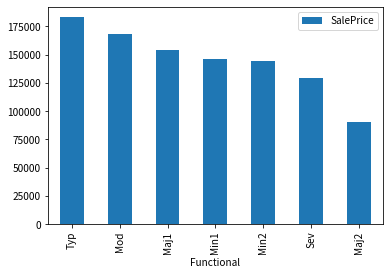

In [94]:
# 觀察房價差異
df = train_test[['Functional', 'SalePrice']]
df.groupby('Functional').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [95]:
# Maj1、Maj2、Sev歸為一類
train_test['Functional'].replace(['Maj1','Maj2','Sev'], 'Maj', inplace=True)

In [96]:
# SaleType:銷售類型

In [97]:
# 觀察na資料
train_test.loc[train_test['SaleType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2490,A_1s_af1946,RL,85.0,13770,Pave,None,Reg,Lvl,Corner,Gtl,Sawyer,Feedr,1Fam,1Story,5,6,1958,1998,Gable,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2007,NaN,Normal,NaN,test,2,0


In [98]:
# 觀察資料分佈
train_test.groupby('SaleType').size().sort_values(ascending=False)

SaleType
WD       2521
New       238
COD        86
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
dtype: int64

In [99]:
# 以眾數替換na值
train_test['SaleType'].fillna('WD', inplace=True)

In [100]:
# ConLI、ConLw、Con歸為一類
train_test['SaleType'].replace(['ConLI','ConLw','Con','ConLD'], 'Con', inplace=True)

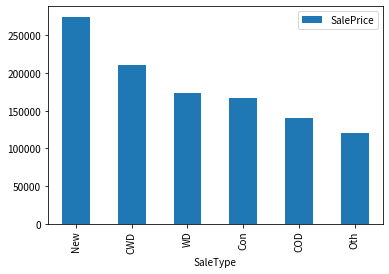

In [101]:
# 觀察房價差異
df = train_test[['SaleType','SalePrice']]
df.groupby('SaleType').mean().sort_values('SalePrice', ascending=False).plot.bar()

In [102]:
# 查看還有哪些object欄位有na值
df_info = pd.DataFrame({'dtypes':train_test.dtypes, 'na':train_test.isna().sum(), 'null':train_test.isnull().sum()})
df_info.loc[df_info['dtypes'] == 'object']
#df_info2 = pd.DataFrame({'dtypes2':train_test.dtypes, 'na2':train_test.isna().sum()})
#df_info.join(df_info2, how='left')

,dtypes,na,null
MSSubClass,object,0,0
MSZoning,object,0,0
Street,object,0,0
Alley,object,0,0
LotShape,object,0,0
LandContour,object,0,0
LotConfig,object,0,0
LandSlope,object,0,0
Neighborhood,object,0,0
Condition1,object,0,0


In [103]:
# Bsmt地下室系列

BsmtQual
Ex     258
Fa      87
Gd    1205
TA    1282
dtype: int64


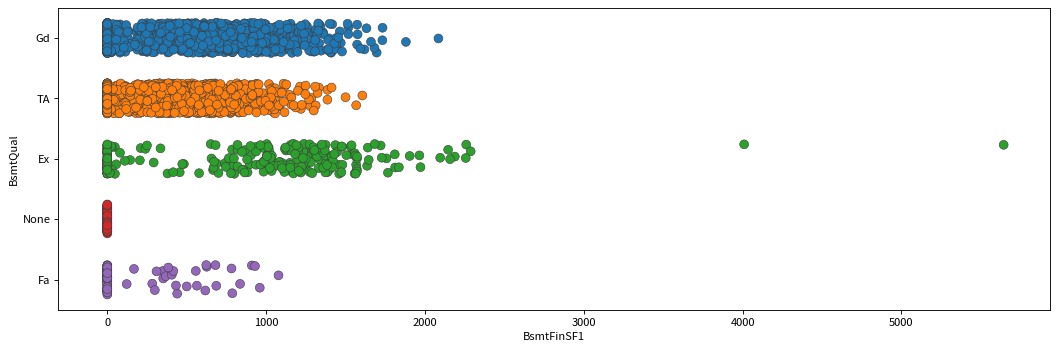

In [104]:
# BsmtQual:，地下室品質，觀察是否na值為沒有地下室
df = train_test[['BsmtQual', 'BsmtFinSF1']]
df['BsmtQual'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('BsmtQual').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.BsmtFinSF1, df.BsmtQual, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 可見BsmtQual為na者就沒有地下室面積，將na值替換成None
train_test['BsmtQual'].fillna('None', inplace=True)

BsmtCond
Fa     104
Gd     122
Po       4
TA    2601
dtype: int64


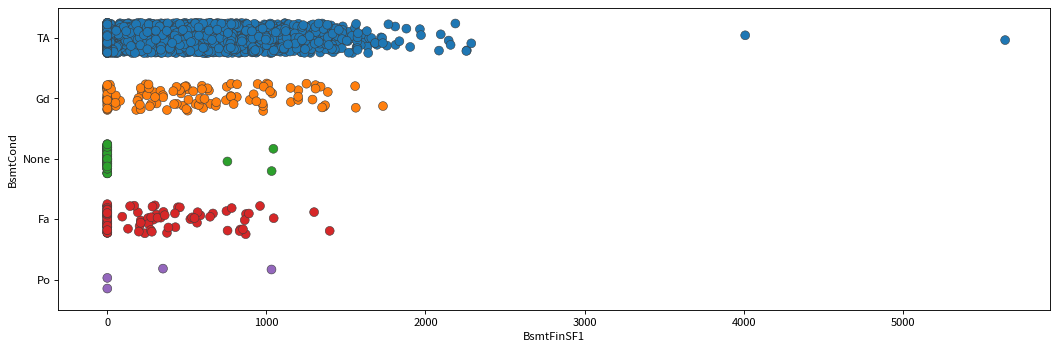

In [105]:
# BsmtCond:地下室狀況，觀察是否na值為沒有地下室
df = train_test[['BsmtCond', 'BsmtFinSF1']]
df['BsmtCond'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('BsmtCond').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.BsmtFinSF1, df.BsmtCond, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 可見BsmtCond為na者就沒有地下室面積，將na值替換成None
train_test['BsmtCond'].fillna('None', inplace=True)

BsmtExposure
Av     417
Gd     275
Mn     239
No    1900
dtype: int64


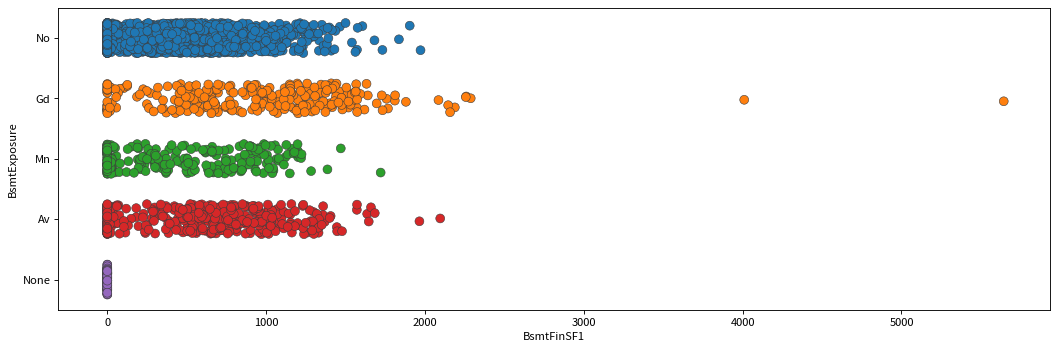

In [106]:
# BsmtExposure:地下室外牆，觀察是否na值為沒有地下室
df = train_test[['BsmtExposure', 'BsmtFinSF1']]
df['BsmtExposure'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('BsmtExposure').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.BsmtFinSF1, df.BsmtExposure, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 可見BsmtExposure為na者就沒有地下室面積，將na值替換成None
train_test['BsmtExposure'].fillna('None', inplace=True)

BsmtFinType1
ALQ    427
BLQ    269
GLQ    847
LwQ    154
Rec    288
Unf    849
dtype: int64


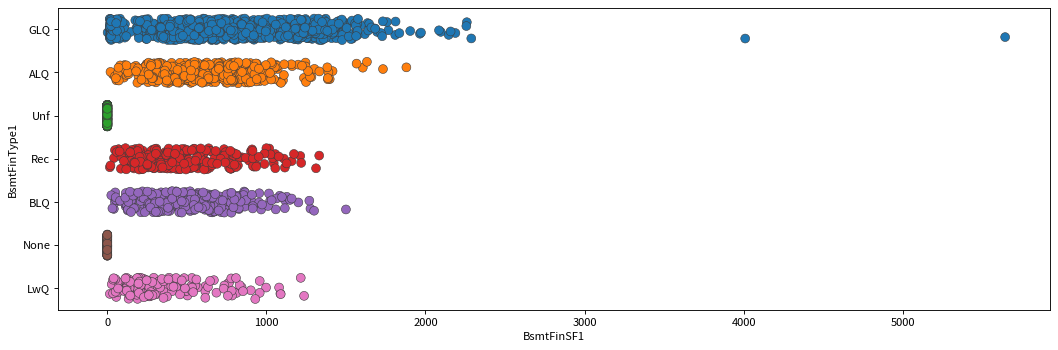

In [107]:
# BsmtFinType1:地下室完成區域的評等，觀察是否na值為沒有地下室
df = train_test[['BsmtFinType1', 'BsmtFinSF1']]
df['BsmtFinType1'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('BsmtFinType1').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.BsmtFinSF1, df.BsmtFinType1, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 可見BsmtFinType1為na者就沒有地下室面積，將na值替換成None
train_test['BsmtFinType1'].fillna('None', inplace=True)

BsmtFinType2
ALQ      52
BLQ      68
GLQ      33
LwQ      86
Rec     105
Unf    2489
dtype: int64


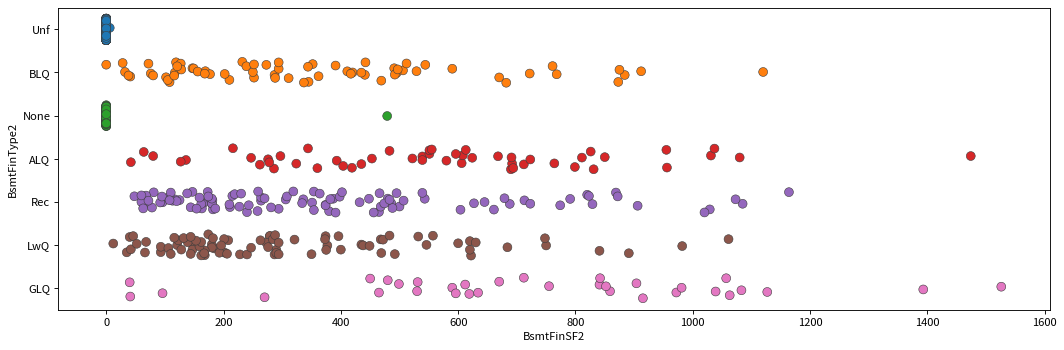

In [108]:
# BsmtFinType2:地下室完成區域的評等(如果有多個)，觀察是否na值為沒有地下室
df = train_test[['BsmtFinType2', 'BsmtFinSF2']]
df['BsmtFinType2'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('BsmtFinType2').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.BsmtFinSF2, df.BsmtFinType2, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 可見BsmtFinType2為na者就沒有地下室面積，將na值替換成None
train_test['BsmtFinType2'].fillna('None', inplace=True)

In [109]:
# KitchenQual:廚房品質
# 觀察資料分佈
print(train_test.groupby('KitchenQual').size())
# 以眾數取代na值
train_test['KitchenQual'].fillna('TA',inplace=True)

KitchenQual
Ex     204
Fa      70
Gd    1147
TA    1491
dtype: int64


In [110]:
# GarageType & GarageFinish & GarageQual & GarageCond 車庫系列

GarageType
2Types       23
Attchd     1719
Basment      36
BuiltIn     185
CarPort      15
Detchd      778
dtype: int64


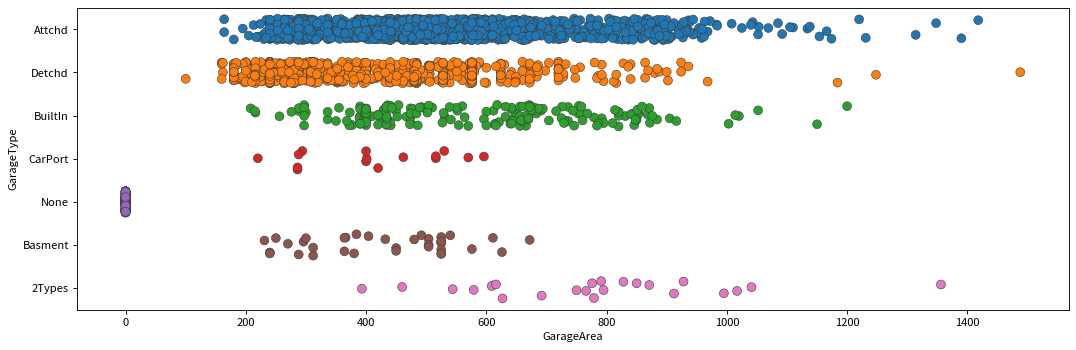

In [111]:
# GarageType:車庫位置，觀察是否na值為沒有地下室
df = train_test[['GarageType', 'GarageArea']]
df['GarageType'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('GarageType').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.GarageArea, df.GarageType, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 將na值替換成None
train_test['GarageType'].fillna('None', inplace=True)

GarageFinish
Fin     715
RFn     810
Unf    1229
dtype: int64


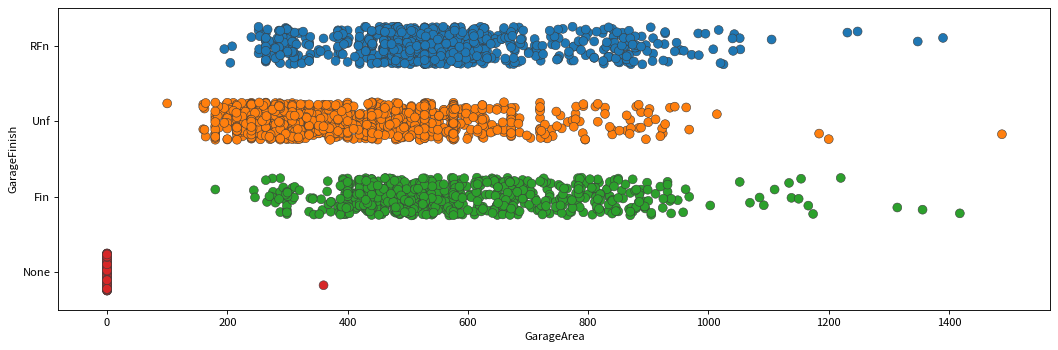

In [112]:
# GarageFinish:車庫內裝，觀察是否na值為沒有地下室
df = train_test[['GarageFinish', 'GarageArea']]
df['GarageFinish'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('GarageFinish').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.GarageArea, df.GarageFinish, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 將na值替換成None
train_test['GarageFinish'].fillna('None', inplace=True)

GarageQual
Ex       3
Fa     124
Gd      24
Po       4
TA    2599
dtype: int64


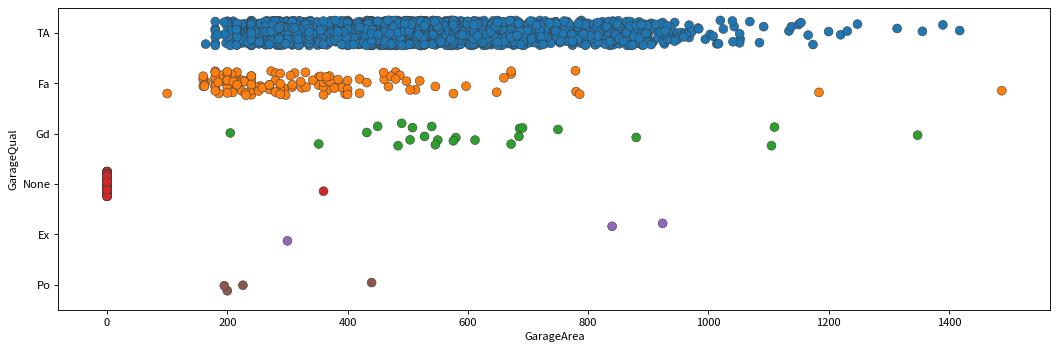

In [113]:
# GarageQual:車庫品質，觀察是否na值為沒有地下室
df = train_test[['GarageQual', 'GarageArea']]
df['GarageQual'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('GarageQual').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.GarageArea, df.GarageQual, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 將na值替換成None
train_test['GarageQual'].fillna('None', inplace=True)

GarageCond
Ex       3
Fa      74
Gd      15
Po      13
TA    2649
dtype: int64


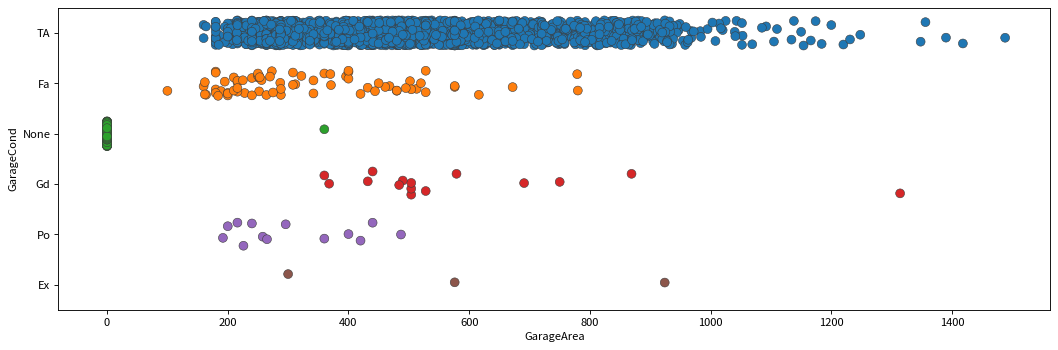

In [114]:
# GarageCond:車庫品質，觀察是否na值為沒有地下室
df = train_test[['GarageCond', 'GarageArea']]
df['GarageCond'].fillna('None', inplace=True)

# 觀察資料分佈
print(train_test.groupby('GarageCond').size())

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.GarageArea, df.GarageCond, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 將na值替換成None
train_test['GarageCond'].fillna('None', inplace=True)

In [115]:
# 再觀察na值數量
obj_des = train_test.describe(include='object')
na_series = pd.DataFrame(len(train_test) - obj_des.loc['count']).T  #T為轉置
na_series = na_series.rename(index={'count':'na_count'})
obj_des_na = pd.concat([obj_des,na_series], axis=0)
na_count = obj_des_na.loc['na_count'].T
na_count.loc[na_count>0]

Series([], Name: na_count, dtype: object)

In [116]:
### 數值型欄位處理 ###
# 若變項有極端值與na值
# Step1:檢查為train或test資料，train刪除、test替換
# Step2:之後看模型結果，如果該變項是重要的，則將該樣本刪除;若該變項不重要，則替換

In [117]:
# 一次觀察所有數值型數值欄位的樣貌
# 加入na值數量至describe表格
num_des = train_test.describe(include='number')
na_series = pd.DataFrame(len(train_test) - num_des.loc['count']).T  #T為轉置
na_series = na_series.rename(index={'count':'na_count'})
num_des_na = pd.concat([num_des,na_series], axis=0)
num_des_na

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,na_num,Exterior_two
count,2428.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2890.000000,2912.00000,2912.000000,2912.000000,2912.000000,2913.000000,2913.000000,2913.000000,2913.000000,2911.000000,2911.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2754.000000,2912.000000,2912.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,1454.000000,2913.000000,2913.000000
mean,69.291598,10164.314109,6.087882,5.565740,1971.302781,1984.253347,102.331142,440.84272,49.359203,561.194368,1051.396291,1158.540680,336.957089,4.704085,1500.201854,0.429749,0.061491,1.567800,0.380707,2.861311,1.044628,6.450738,0.596979,1978.117284,1.765797,472.685440,93.806728,47.495022,22.924133,2.607621,16.054240,2.256437,45.094748,6.211123,2007.794713,180751.338377,1.101957,0.092345
std,23.360854,7893.982168,1.409775,1.111822,30.290098,20.893380,179.452193,454.97673,168.993917,439.684555,440.586492,390.890235,428.879181,46.444109,505.771096,0.524776,0.245924,0.553107,0.503011,0.822914,0.214673,1.569277,0.646433,25.561810,0.761553,215.439322,126.599055,67.613220,63.991925,25.213828,56.205286,35.700522,473.201190,2.715642,1.314965,79379.086660,1.596992,0.289562
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,59.000000,7472.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.00000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129925.000000,0.000000,0.000000
50%,68.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.50000,0.000000,468.000000,988.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162950.000000,1.000000,0.000000
75%,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.00000,0.000000,806.000000,1302.000000,1384.000000,704.000000,0.000000,1743.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.00000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,755000.000000,12.000000,1.000000
na_count,485.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1459.000000,0.000000,0.000000


In [118]:
# 列出有na值的數值型欄位
na_count = num_des_na.loc['na_count'].T
na_count.loc[na_count>0]

LotFrontage      485.0
MasVnrArea        23.0
BsmtFinSF1         1.0
BsmtFinSF2         1.0
BsmtUnfSF          1.0
TotalBsmtSF        1.0
BsmtFullBath       2.0
BsmtHalfBath       2.0
GarageYrBlt      159.0
GarageCars         1.0
GarageArea         1.0
SalePrice       1459.0
Name: na_count, dtype: float64

In [119]:
# 預感有一個樣本有多個na值(Bsmt系列)
train_test.loc[train_test['BsmtFinSF1'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,A_1s_af1946,RM,99.0,5940,Pave,None,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,Con,Abnorml,NaN,test,12,1


In [120]:
# 預感另一個多na樣本
train_test.loc[train_test['BsmtFullBath'].isna()]
# 但這些皆為test資料，無法刪除，只能處理

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,A_1s_af1946,RM,99.0,5940,Pave,None,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,Con,Abnorml,NaN,test,12,1
2189,A_1s_af1946,RL,123.0,47007,Pave,None,IR1,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,7,1959,1996,Gable,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal,NaN,test,8,0


In [121]:
# LotFrontage:連接到物業的街道的線性英尺

{'whiskers': [<matplotlib.lines.Line2D at 0x12a445a20>,
 'caps': [<matplotlib.lines.Line2D at 0x12a445780>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a445da0>],
 'medians': [<matplotlib.lines.Line2D at 0x12a4571d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a457940>],
 'means': []}

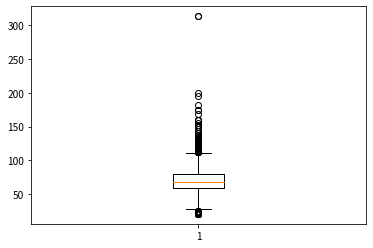

In [122]:
# 查看極端值現象
df = train_test['LotFrontage'].dropna()
plt.boxplot(df) 

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'whiskers': [<matplotlib.lines.Line2D at 0x12af8f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12af73470>,
 'boxes': [<matplotlib.lines.Line2D at 0x12af8f668>],
 'medians': [<matplotlib.lines.Line2D at 0x12af735c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12af73ba8>],
 'means': []}

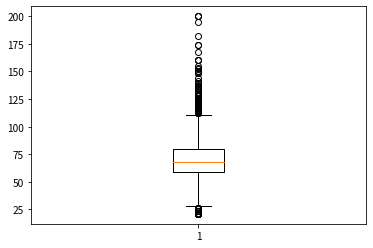

In [123]:
# 取代極端值
train_test['LotFrontage'].loc[train_test['LotFrontage'] > 300] = 200
plt.boxplot(train_test['LotFrontage'].dropna())

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


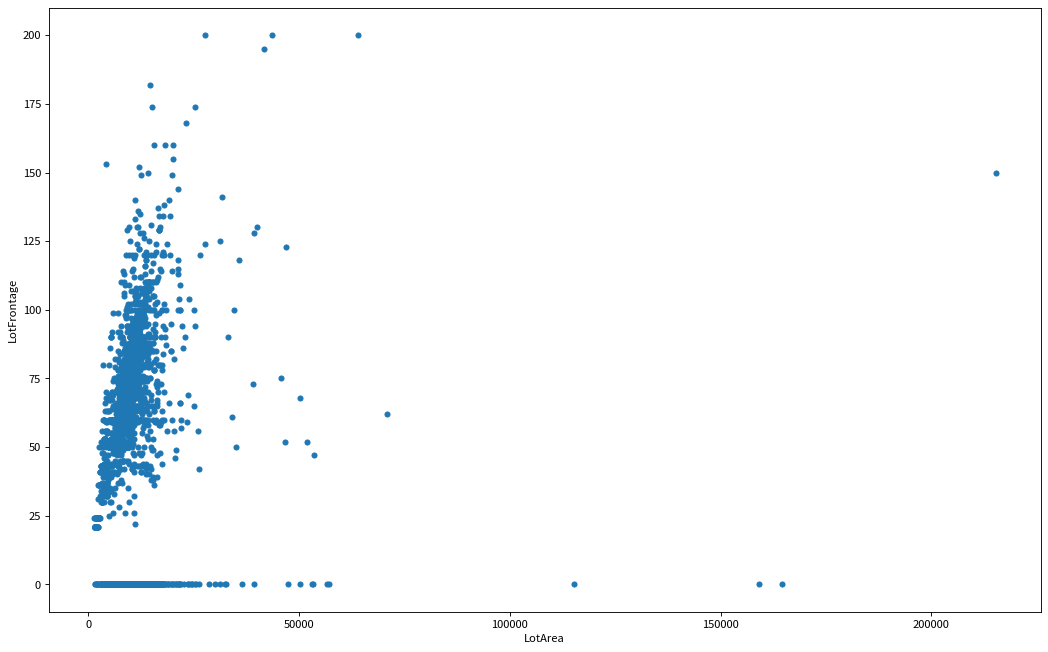

In [124]:
# 觀察na是否為沒有連接道路
df = train_test[['LotArea', 'LotFrontage']]
df['LotFrontage'].fillna(0, inplace=True)

# 繪圖
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('LotArea', 'LotFrontage', data=df, s=20)
plt.gca().set(xlabel='LotArea', ylabel='LotFrontage')

# 雖然LotFrontage和LotArea看似有關聯，但將na值替換成0後，關聯性又降低
# 求保險，以平均替換
train_test['LotFrontage'].fillna(train_test.LotFrontage.mean(), inplace=True)

In [125]:
# LotArea:平方英尺大小（處理極端值）

{'whiskers': [<matplotlib.lines.Line2D at 0x12a96d4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x11c552470>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a99ba20>],
 'medians': [<matplotlib.lines.Line2D at 0x11c552b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c552e48>],
 'means': []}

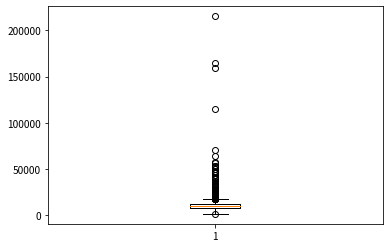

In [126]:
# 查看極端值現象
plt.boxplot(train_test['LotArea'])

In [127]:
# 查看這些超大房子長啥樣
bighouse = train_test.loc[train_test['LotArea'] > 100000]
bighouse

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250,E_1.5s,RL,69.198517,159000,Pave,None,IR2,Low,CulDSac,Sev,ClearCr,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,None,None,Shed,500,6,2007,WD,Normal,277000.0,train,1,1
314,A_1s_af1946,RL,150.000000,215245,Pave,None,IR3,Low,Inside,Sev,Timber,Norm,1Fam,1Story,7,5,1965,1965,Hip,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,TA,Y,SBrkr,2036,0,0,2036,2.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2.0,513.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,375000.0,train,0,0
336,O_two-family,RL,69.198517,164660,Grvl,None,IR1,HLS,Corner,Sev,Timber,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,Ex,Y,SBrkr,1619,167,0,1786,2.0,0.0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2.0,529.0,TA,TA,Y,670,0,0,0,0,0,None,None,Shed,700,8,2008,WD,Normal,228950.0,train,1,0
707,A_1s_af1946,RL,69.198517,115149,Pave,None,IR2,Low,CulDSac,Sev,ClearCr,Norm,1Fam,1Story,7,5,1971,2002,Gable,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,None,None,None,0,6,2007,WD,Normal,302000.0,train,1,0


[Text(0, 0.5, 'SalePrice'), Text(0.5, 0, 'LotArea')]

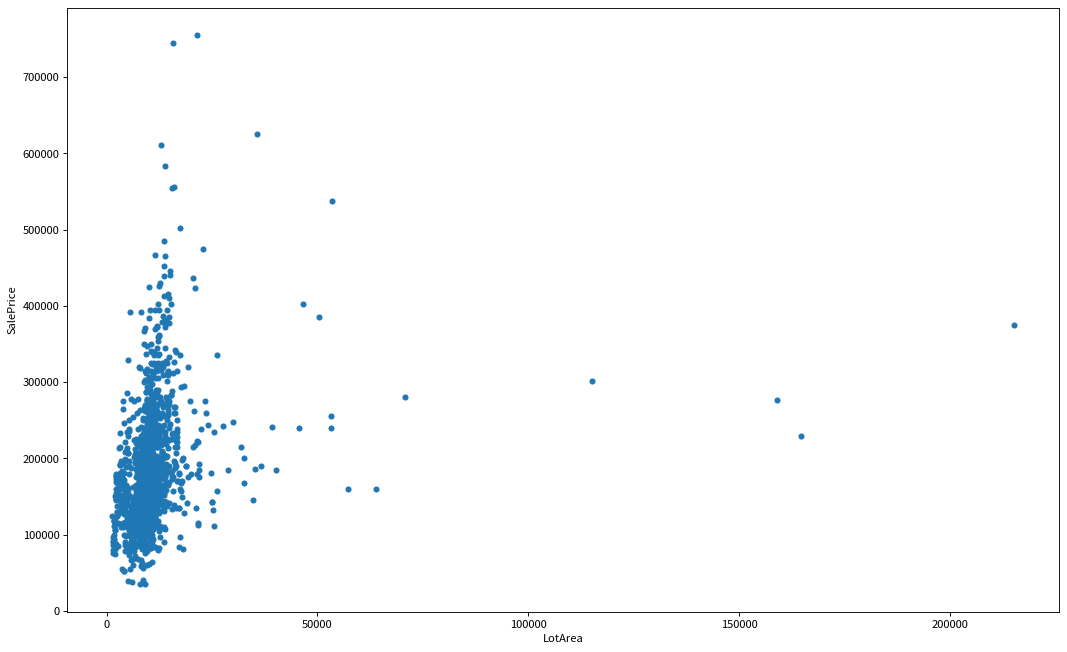

In [128]:
# 觀察LotArea與房價的關係
df = train_test[['LotArea', 'SalePrice']]

# 繪圖
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('LotArea', 'SalePrice', data=df, s=20)
plt.gca().set(xlabel='LotArea', ylabel='SalePrice')

In [129]:
# 大房子都是train的資料，且LotArea與Price有中度關聯性，離群直接刪除
train_test.drop(bighouse.index, inplace=True)

In [130]:
# 1stFlrSF:一樓平方英尺（處理極端值）

{'whiskers': [<matplotlib.lines.Line2D at 0x12b45def0>,
 'caps': [<matplotlib.lines.Line2D at 0x12b46a828>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b45ddd8>],
 'medians': [<matplotlib.lines.Line2D at 0x12b46aeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b46af98>],
 'means': []}

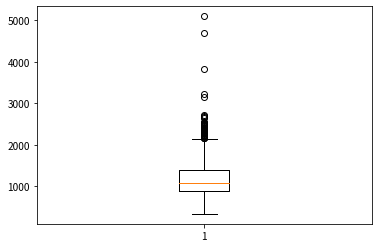

In [131]:
# 觀察資料分佈
plt.boxplot(train_test['1stFlrSF'])

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'whiskers': [<matplotlib.lines.Line2D at 0x12ad06c50>,
 'caps': [<matplotlib.lines.Line2D at 0x12ad06f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ad06898>],
 'medians': [<matplotlib.lines.Line2D at 0x12aea69b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12aea6cf8>],
 'means': []}

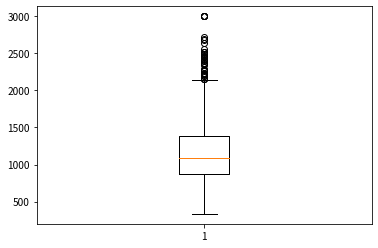

In [132]:
# 替換極端值
train_test['1stFlrSF'].loc[train_test['1stFlrSF'] > 3000] = 3000
plt.boxplot(train_test['1stFlrSF'])

In [133]:
# GrLivArea:地面（地面）以上的居住面積平方英尺（處理極端值）

{'whiskers': [<matplotlib.lines.Line2D at 0x12aec4ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x12b05ff60>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b05f4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x12b06b630>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b06b978>],
 'means': []}

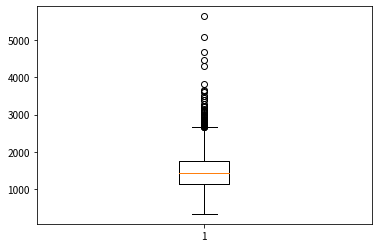

In [134]:
# 觀察資料分佈
plt.boxplot(train_test['GrLivArea'])

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'whiskers': [<matplotlib.lines.Line2D at 0x12b0c3438>,
 'caps': [<matplotlib.lines.Line2D at 0x12b0c3ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b0c3080>],
 'medians': [<matplotlib.lines.Line2D at 0x12b0c3ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b12b4e0>],
 'means': []}

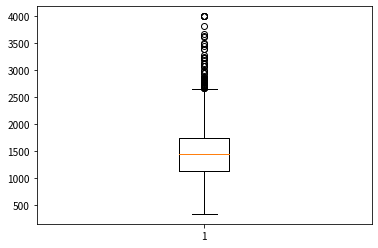

In [135]:
# 替換極端值
train_test['GrLivArea'].loc[train_test['GrLivArea'] > 4000] = 4000
plt.boxplot(train_test['GrLivArea'])

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


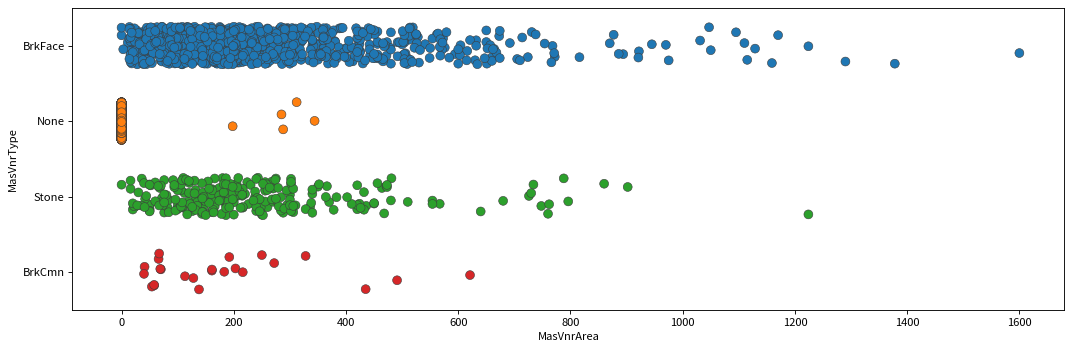

In [136]:
# MasVnrArea:石工外飾面積，繪圖觀察na值是否為沒有外飾
df = train_test[['MasVnrType', 'MasVnrArea']]
df['MasVnrArea'].fillna(0, inplace=True)

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.MasVnrArea, df.MasVnrType, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

# 將na值替換成0
train_test['MasVnrArea'].fillna(0, inplace=True)

In [137]:
# Bsmt系列
train_test.loc[train_test['BsmtFinSF1'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,A_1s_af1946,RM,99.0,5940,Pave,None,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,Con,Abnorml,NaN,test,12,1


In [138]:
# 多個na值出現在同一樣本，表示該建築沒有地下室，以0取代na
train_test[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']] = train_test[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(0)

In [139]:
# Bsmt Bath系列
train_test.loc[train_test['BsmtHalfBath'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,A_1s_af1946,RM,99.0,5940,Pave,None,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,0.0,None,0.0,0.0,0.0,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,Con,Abnorml,NaN,test,12,1
2189,A_1s_af1946,RL,123.0,47007,Pave,None,IR1,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,7,1959,1996,Gable,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,TA,Y,SBrkr,3000,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal,NaN,test,8,0


In [140]:
# 皆沒有地下室，以0取代na
train_test[['BsmtFullBath','BsmtHalfBath']] = train_test[['BsmtFullBath','BsmtHalfBath']].fillna(0)

In [141]:
# Garage系列
train_test.loc[train_test['GarageCars'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,G_2s_bf1945,RM,50.0,9060,Pave,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,1Fam,2Story,5,6,1923,1999,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,NaN,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca,NaN,test,7,1


In [142]:
# 皆沒有車庫，以0取代na
train_test[['GarageCars','GarageArea']] = train_test[['GarageCars','GarageArea']].fillna(0)

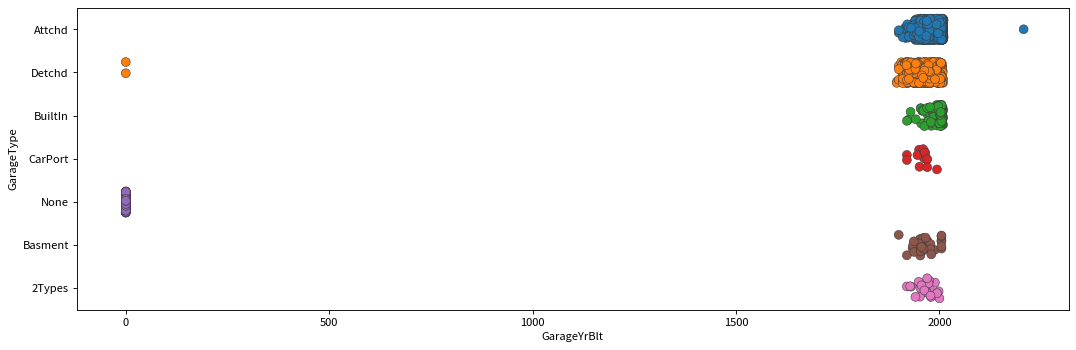

In [143]:
# GarageYrBlt:車庫建造年份，看na值是否為沒有車庫
df = train_test[['GarageType', 'GarageYrBlt']]
df['GarageYrBlt'].fillna(0, inplace=True)

# 繪圖
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df.GarageYrBlt, df.GarageType, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

In [144]:
# 有兩個樣本有GarageType，但沒有年份，將此資料替換成平均年
mask1 = train_test['GarageYrBlt'].isna()
mask2 = train_test['GarageType'] == 'Detchd'
train_test['GarageYrBlt'].loc[(mask1 & mask2)] = train_test['GarageYrBlt'].mean()

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [145]:
# 其它為沒有車庫，以0替換
train_test['GarageYrBlt'].fillna(0, inplace=True)

In [146]:
# 再觀察na值數量
num_des = train_test.describe(include='number')
na_series = pd.DataFrame(len(train_test) - num_des.loc['count']).T  #T為轉置
na_series = na_series.rename(index={'count':'na_count'})
num_des_na = pd.concat([num_des,na_series], axis=0)
na_count = num_des_na.loc['na_count'].T
na_count.loc[na_count>0]

SalePrice    1459.0
Name: na_count, dtype: float64

In [147]:
# 開始將類別型欄位轉為虛擬變項

In [148]:
# 創建類別型欄位的list，方便之後使用
df = pd.DataFrame({'dtypes':train_test.dtypes})
ob_col_list = list(df.loc[df['dtypes'] == 'object'].index)
ob_col_list

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'source']

In [149]:
# 將類別型欄位的值前面，都加上欄位名稱，方便閱讀
train_test_dummy = train_test

for i in ob_col_list:
    train_test_dummy[i] = train_test_dummy[i].apply(lambda x: i + '_' + x)
train_test_dummy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,na_num,Exterior_two
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MSSubClass_F_2s_af1946,MSZoning_RL,65.0,8450,Street_Pave,Alley_None,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,BldgType_1Fam,HouseStyle_2Story,7,5,2003,2003,RoofStyle_Gable,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,196.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType1_GLQ,706.0,BsmtFinType2_Unf,0.0,150.0,856.0,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,KitchenQual_Gd,8,Functional_Typ,0,FireplaceQu_None,GarageType_Attchd,2003.0,GarageFinish_RFn,2.0,548.0,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,61,0,0,0,0,PoolQC_None,Fence_None,MiscFeature_None,0,2,2008,SaleType_WD,SaleCondition_Normal,208500.0,source_train,0,0
2,MSSubClass_A_1s_af1946,MSZoning_RL,80.0,9600,Street_Pave,Alley_None,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,Neighborhood_Veenker,Condition1_Feedr,BldgType_1Fam,HouseStyle_1Story,6,8,1976,1976,RoofStyle_Gable,Exterior1st_MetalSd,Exterior2nd_MetalSd,MasVnrType_None,0.0,ExterQual_TA,ExterCond_TA,Foundation_CBlock,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtFinType1_ALQ,978.0,BsmtFinType2_Unf,0.0,284.0,1262.0,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,KitchenQual_TA,6,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,1976.0,GarageFinish_RFn,2.0,460.0,GarageQual_TA,GarageCond_TA,PavedDrive_Y,298,0,0,0,0,0,PoolQC_None,Fence_None,MiscFeature_None,0,5,2007,SaleType_WD,SaleCondition_Normal,181500.0,source_train,0,0
3,MSSubClass_F_2s_af1946,MSZoning_RL,68.0,11250,Street_Pave,Alley_None,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,BldgType_1Fam,HouseStyle_2Story,7,5,2001,2002,RoofStyle_Gable,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,162.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Mn,BsmtFinType1_GLQ,486.0,BsmtFinType2_Unf,0.0,434.0,920.0,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,KitchenQual_Gd,6,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,2001.0,GarageFinish_RFn,2.0,608.0,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,42,0,0,0,0,PoolQC_None,Fence_None,MiscFeature_None,0,9,2008,SaleType_WD,SaleCondition_Normal,223500.0,source_train,0,0
4,MSSubClass_G_2s_bf1945,MSZoning_RL,60.0,9550,Street_Pave,Alley_None,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,Neighborhood_Crawfor,Condition1_Norm,BldgType_1Fam,HouseStyle_2Story,7,5,1915,1970,RoofStyle_Gable,Exterior1st_Wd Sdng,Exterior2nd_WdShing,MasVnrType_None,0.0,ExterQual_TA,ExterCond_TA,Foundation_BrkTil,BsmtQual_TA,BsmtCond_Gd,BsmtExposure_No,BsmtFinType1_ALQ,216.0,BsmtFinType2_Unf,0.0,540.0,756.0,HeatingQC_Gd,CentralAir_Y,Electrical_SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,KitchenQual_Gd,7,Functional_Typ,1,FireplaceQu_Gd,GarageType_Detchd,1998.0,GarageFinish_Unf,3.0,642.0,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,35,272,0,0,0,PoolQC_None,Fence_None,MiscFeature_None,0,2,2006,SaleType_WD,SaleCondition_Abnorml,140000.0,source_train,0,1

In [150]:
# 將類別型欄位轉為虛擬變項
for i in ob_col_list:
    dummy = pd.get_dummies(train_test_dummy[i])
    train_test_dummy = pd.concat([train_test_dummy, dummy], axis=1)
    train_test_dummy.drop(i, axis=1, inplace=True)
train_test_dummy

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,na_num,Exterior_two,MSSubClass_A_1s_af1946,MSSubClass_B_1s_bf1945,MSSubClass_C_1s_attic,MSSubClass_D_1.5s_unf,MSSubClass_E_1.5s,MSSubClass_F_2s_af1946,MSSubClass_G_2s_bf1945,MSSubClass_H_mul-lev,MSSubClass_I_foyer,MSSubClass_J_duplex,MSSubClass_K_1s_af1946_pud,MSSubClass_M_2s_af1946_pud,MSSubClass_N_mul-lev&foyer_pud,MSSubClass_O_two-family,MSSubClass_P_2.5s,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkComn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,

In [151]:
# 使用RandomForestRegressor排序特徵重要性
# 訓練樣本
from sklearn.ensemble import RandomForestRegressor
train_new = train_test_dummy.loc[train_test_dummy['source_train'] == 1]
train_new_y = train_new['SalePrice']
train_new_x = train_new.drop(['SalePrice','source_test','source_train'], axis=1)

# 建立模型
RF = RandomForestRegressor(n_estimators=400)
RF.fit(train_new_x, train_new_y)

imp = RF.feature_importances_
imp = pd.DataFrame({'feature': train_new_x.columns, 'score': imp})

# 按照特徵重要性進行降冪排序, 最重要的特徵在最前面
imp = imp.sort_values(['score'], ascending=False)

# 輸出csv檔案，方便未來取用
imp.to_csv("feature_importances_rfr_3.csv", index=False)

In [199]:
# submission:挑選前100個重要欄位，xgboost
# learning_rate以0.1，逐步調整其它參數
# 觀察r_square變化

# 特徵清單
imp_df = pd.read_csv('feature_importances_rfr_3.csv', encoding='utf-8')
imp_top100 = list(imp_df.sort_values(['score'], ascending=False)[0:100]['feature'])

# 訓練樣本
train_new = train_test_dummy.loc[train_test_dummy['source_train'] == 1]
train_new_y = train_new['SalePrice']
train_new_x = train_new[imp_top100]

# 測試樣本
test_new = train_test_dummy.loc[train_test_dummy['source_test'] == 1]
test_new = test_new[imp_top100]

# 訓練模型
import xgboost as xgb
classifier = xgboost.XGBRegressor()
classifier.fit(train_new_x, train_new_y)

# 評分模型
from sklearn import metrics
pre_train_new_y = classifier.predict(train_new_x)
print(metrics.r2_score(train_new_y,pre_train_new_y))

# 導入調參數所需套件
#import pandas as pd
#import numpy as np
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# 定義調參數所需要函數
def modelfit(alg, X, Y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    alg.fit(X, Y, eval_metric='rmse') #建模
    Y_pre = alg.predict(X) #對訓練X預測
    print('This Model')
    print('rs_square:', metrics.r2_score(Y,Y_pre))

# 建立base模型
classifier_1 = xgboost.XGBRegressor(base_score=0.5,
                                    colsample_bylevel=1,
                                    colsample_bytree=1,
                                    gamma=0,
                                    learning_rate=0.1,
                                    max_delta_step=0,
                                    max_depth=3,
                                    min_child_weight=1,
                                    missing=None,
                                    n_estimators=100,
                                    nthread=1,
                                    objective='reg:linear',
                                    reg_alpha=0,
                                    reg_lambda=1,
                                    scale_pos_weight=1,
                                    seed=1850,
                                    silent=True,
                                    subsample=1)
# 評分模型
modelfit(classifier_1,train_new_x, train_new_y)

[15:27:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.963212833174494


/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


This Model
rs_square: 0.963212833174494


In [ ]:
# 先針對max_depth和min_child_weight調整，使用交叉驗證查看結果
param_try1 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor(base_score=0.5,
                                                         colsample_bylevel=1,
                                                         colsample_bytree=1,
                                                         gamma=0,
                                                         learning_rate=0.1,
                                                         max_delta_step=0,
                                                         missing=None,
                                                         n_estimators=100,
                                                         nthread=1,
                                                         objective='reg:linear',
                                                         reg_alpha=0,
                                                         reg_lambda=1,
                                                         scale_pos_weight=1,
                                                         seed=1850,
                                                         silent=True,
                                                         subsample=1), param_grid = param_try1, scoring='r2', cv=5)
gsearch1.fit(train_new_x,train_new_y)
for i in ['mean_test_score', 'param_max_depth', 'param_min_child_weight']:
    print(i, ':', gsearch1.cv_results_[i])

# 最佳max_depth為3，min_child_weight為1

In [191]:
# 最佳max_depth為3，min_child_weight為1
# 再上下測一次
param_try2 = {'max_depth':[2,3,4], 'min_child_weight':[1,2]}
gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(base_score=0.5,
                                                         colsample_bylevel=1,
                                                         colsample_bytree=1,
                                                         gamma=0,
                                                         learning_rate=0.1,
                                                         max_delta_step=0,
                                                         missing=None,
                                                         n_estimators=100,
                                                         nthread=1,
                                                         objective='reg:linear',
                                                         reg_alpha=0,
                                                         reg_lambda=1,
                                                         scale_pos_weight=1,
                                                         seed=1850,
                                                         silent=True,
                                                         subsample=1), param_grid = param_try2, scoring='r2', cv=5)
gsearch2.fit(train_new_x,train_new_y)
for i in ['mean_test_score', 'param_max_depth', 'param_min_child_weight']:
    print(i, ':', gsearch2.cv_results_[i])
# 同樣結果

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/py

mean_test_score : [0.88128327 0.87377225 0.89067246 0.88158537 0.88824318 0.87901421]
param_max_depth : [2 2 3 3 4 4]
param_min_child_weight : [1 2 1 2 1 2]


In [195]:
# max_depth為3，min_child_weight為1
# 調整subsample, colsample_bytree
param_try3 = {'subsample':[0.8,0.9,1], 'colsample_bytree':[0.8,0.9,1]}
gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(base_score=0.5,
                                                         max_depth=3,
                                                         min_child_weight=1,
                                                         colsample_bylevel=1,
                                                         gamma=0,
                                                         learning_rate=0.1,
                                                         max_delta_step=0,
                                                         missing=None,
                                                         n_estimators=100,
                                                         nthread=1,
                                                         objective='reg:linear',
                                                         reg_alpha=0,
                                                         reg_lambda=1,
                                                         scale_pos_weight=1,
                                                         seed=1850,
                                                         silent=True), param_grid = param_try3, scoring='r2', cv=5)
gsearch3.fit(train_new_x,train_new_y)
for i in ['mean_test_score', 'param_subsample', 'param_colsample_bytree']:
    print(i, ':', gsearch3.cv_results_[i])

# 最佳subsample為0.9、colsample_bytree為1

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/py

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/py

mean_test_score : [0.8836155  0.88839756 0.88940942 0.88326594 0.88917743 0.88612608
 0.88430574 0.89111918 0.89067246]
param_subsample : [0.8 0.9 1 0.8 0.9 1 0.8 0.9 1]
param_colsample_bytree : [0.8 0.8 0.8 0.9 0.9 0.9 1 1 1]


In [196]:
# max_depth為3、min_child_weight為1、subsample為0.9、colsample_bytree為1
# 調整gamma
param_try4 = {'gamma':[0,0.05,0.1,0.15,0.2]}
gsearch4 = GridSearchCV(estimator = xgboost.XGBRegressor(base_score=0.5,
                                                         max_depth=3,
                                                         min_child_weight=1,
                                                         subsample=0.9,
                                                         colsample_bytree=1,
                                                         colsample_bylevel=1,
                                                         learning_rate=0.1,
                                                         max_delta_step=0,
                                                         missing=None,
                                                         n_estimators=100,
                                                         nthread=1,
                                                         objective='reg:linear',
                                                         reg_alpha=0,
                                                         reg_lambda=1,
                                                         scale_pos_weight=1,
                                                         seed=1850,
                                                         silent=True), param_grid = param_try4, scoring='r2', cv=5)
gsearch4.fit(train_new_x,train_new_y)
for i in ['mean_test_score', 'param_gamma']:
    print(i, ':', gsearch4.cv_results_[i])
    
# 最佳gamma為0

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/py

mean_test_score : [0.89111918 0.89111918 0.89111918 0.89111918 0.89111918]
param_gamma : [0 0.05 0.1 0.15 0.2]


In [198]:
# max_depth為3、min_child_weight為1、subsample為0.9、colsample_bytree為1、gamma為0
# 調整colsample_bylevel
param_try5 = {'colsample_bylevel':[0.7,0.8,0.9,1]}
gsearch5 = GridSearchCV(estimator = xgboost.XGBRegressor(base_score=0.5,
                                                         max_depth=3,
                                                         min_child_weight=1,
                                                         subsample=0.9,
                                                         colsample_bytree=1,
                                                         gamma=0,
                                                         learning_rate=0.1,
                                                         max_delta_step=0,
                                                         missing=None,
                                                         n_estimators=100,
                                                         nthread=1,
                                                         objective='reg:linear',
                                                         reg_alpha=0,
                                                         reg_lambda=1,
                                                         scale_pos_weight=1,
                                                         seed=1850,
                                                         silent=True), param_grid = param_try5, scoring='r2', cv=5)
gsearch5.fit(train_new_x,train_new_y)
for i in ['mean_test_score', 'param_colsample_bylevel']:
    print(i, ':', gsearch5.cv_results_[i])
    
# 最佳colsample_bylevel為1

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/py

mean_test_score : [0.88649034 0.89008765 0.89087513 0.89111918]
param_colsample_bylevel : [0.7 0.8 0.9 1]


In [200]:
# max_depth為3、min_child_weight為1、subsample為0.9、colsample_bytree為1、gamma為0、colsample_bylevel為1
# 建立模型
classifier_2 = xgboost.XGBRegressor(base_score=0.5,
                                    colsample_bylevel=1,
                                    colsample_bytree=1,
                                    gamma=0,
                                    learning_rate=0.1,
                                    max_delta_step=0,
                                    max_depth=3,
                                    min_child_weight=1,
                                    missing=None,
                                    n_estimators=100,
                                    nthread=1,
                                    objective='reg:linear',
                                    reg_alpha=0,
                                    reg_lambda=1,
                                    scale_pos_weight=1,
                                    seed=1850,
                                    silent=True,
                                    subsample=0.9)
# 評分模型
modelfit(classifier_2,train_new_x, train_new_y)

# 原本rs_square:963212833174494 調整後:0.9643849014852068

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


This Model
rs_square: 0.9643849014852068


In [220]:
# 直接調整n_estimators，多次上傳結果測試後，400為佳
classifier_3 = xgboost.XGBRegressor(base_score=0.5,
                                    colsample_bylevel=1,
                                    colsample_bytree=1,
                                    gamma=0,
                                    learning_rate=0.1,
                                    max_delta_step=0,
                                    max_depth=3,
                                    min_child_weight=1,
                                    missing=None,
                                    n_estimators=400,
                                    nthread=1,
                                    objective='reg:linear',
                                    reg_alpha=0,
                                    reg_lambda=1,
                                    scale_pos_weight=1,
                                    seed=1850,
                                    silent=True,
                                    subsample=0.9)
# 評分模型
modelfit(classifier_3,train_new_x, train_new_y)

/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/et/Documents/PycharmProjects/House_Prices/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


This Model
rs_square: 0.9999847418381076


In [219]:
# 預測資料
pre = classifier_3.predict(test_new)
pre = pd.Series(pre)

# 輸出結果
submission = pd.read_csv('sample_submission.csv', encoding='utf-8')
submission['SalePrice'] = pre
submission.set_index('Id', inplace=True)
submission.to_csv('submission.csv', encoding='utf-8')

# 最後得分為